<a href="https://colab.research.google.com/github/ikarlin86/projects/blob/main/Ingest%C3%A3o_de_Dados_via_API_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codando API com o D[3]
Ingestã de Dados

In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Requisição dos dados dos Deputados
url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros = {}
resposta   = requests.request("GET", url, params=parametros)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']

In [3]:
# Requisição dos dados dos Deputados utilizando parametros
url              = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros       = {'id': 204554}
resposta         = requests.request("GET", url, params=parametros)
objetos          = json.loads(resposta.text)
dados_parametros = objetos['dados']

In [4]:
df = pd.DataFrame(dados)
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,Abílio Santana,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliosantana@camara.leg.br
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,PSL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.abouanni@camara.leg.br
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,PROS,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             512 non-null    int64 
 1   uri            512 non-null    object
 2   nome           512 non-null    object
 3   siglaPartido   512 non-null    object
 4   uriPartido     512 non-null    object
 5   siglaUf        512 non-null    object
 6   idLegislatura  512 non-null    int64 
 7   urlFoto        512 non-null    object
 8   email          512 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.1+ KB


[]

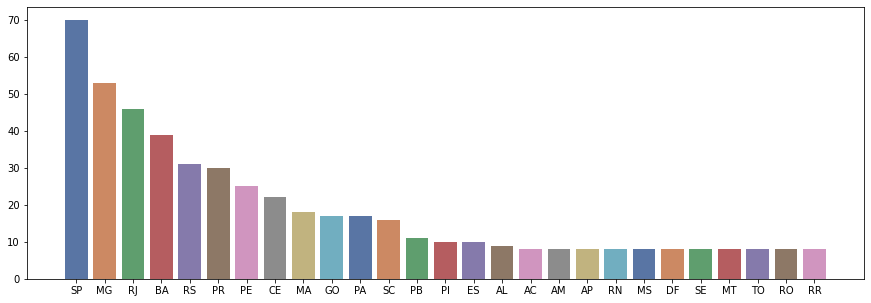

In [6]:
# Análise da quantidade de deputados pela UF
x = df['siglaUf'].value_counts().index
y = df['siglaUf'].value_counts().values
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

[]

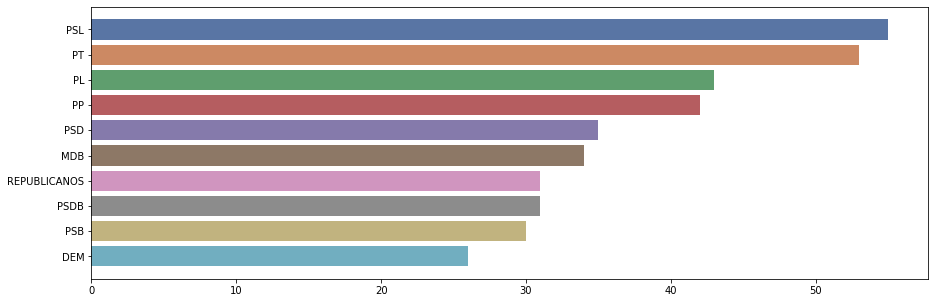

In [7]:
# Análise da quantidade de deputados por Partido
x = df['siglaPartido'].value_counts().head(10).values
y = df['siglaPartido'].value_counts().head(10).index
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

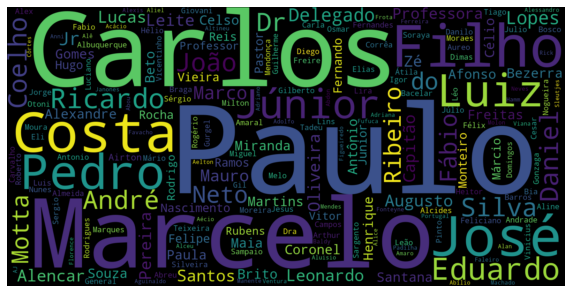

In [8]:
# Análise de nomes de deputados mais comuns
todos_itens = ' '.join(s for s in df['nome'].values)
stop_words = ['de','da']
 
# criar uma wordcloud
wc = WordCloud(stopwords=stop_words, 
               background_color="black",
               width=1600, height=800)
wordcloud = wc.generate(todos_itens)
 
# plotar wordcloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()